# Homework 4

Before you run your homework run the code below:

In [333]:
import os
import sys
import hashlib
import pandas as pd
import numpy as np
import time
from urllib.request import urlopen
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from scipy import cluster
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression

assert os.path.exists('../homeworks/HW4.ipynb')

info = sys.platform + '\n' + sys.version + '\n' + os.getcwd() + '\n' + os.getlogin()
name = hashlib.sha256(info.encode('utf-8')).hexdigest()
with open('../other/hw-4-'+name,'w') as f:
    f.write(info)

In [43]:
with open('../other/hw-4-'+name,'r') as f:
    info = f.read()
name = hashlib.sha256(info.encode('utf-8')).hexdigest()
assert os.path.exists('../other/hw-4-'+name)

## Task

Apply all of the supervised and unsupervised classification and clustering algorithms we learned so far for the [sonar dataset from UCI][ http://archive.ics.uci.edu/ml/datasets/connectionist+bench+(sonar,+mines+vs.+rocks) ].

The code for downloading the data is below. Don't load the data again and again in each subtask, refer the data as `SONAR` after you run the cell below.

In [44]:
with urlopen("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data") as fil:
    SONAR = pd.read_csv(fil, delimiter=',', header=None)

Before starting, for this data set we should use a supervised classification problem. We already have our labels so clustering will not work. Supervised classification methods we learned are KNN, Logistic Regression, Linear Regression and Naive Bayes. Since K-Means and Hierarchical Clustering are unsupervised clustering methods, for this data set they are not important.   

Note that in the  [Data Set Description](http://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.names), it says "Gorman and Sejnowski further report that a nearest neighbor classifier on
the same data gave an 82.7% probalility of correct classification." . We can also see here that KNN method gave the best accuracy score.

## Organizing The Data

In [83]:
SONAR.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [46]:
SONAR.shape

(208, 61)

Since the last column shows labels; "R" if the object is a rock and "M" if it is a mine, it would be good to rename it as 'Labels'.

In [48]:
SONAR.rename(columns = {60 :'Label'}, inplace = True)
SONAR.Label = SONAR.Label.astype('category')

In [49]:
SONAR.groupby('Label').size()

Label
M    111
R     97
dtype: int64

## Subtask 1: K-Nearest Neighbor

After defining x, we normalized the data. Because in the data, there are some points with high differences so we can see that the points do not have a uniform scale. Then we split 75% of the data into our training set, and the rest of the data into the test set. 

We defined a Classifier with 2 neighbors with the minskowski the distance. Our Classifier should be fit with the train data. To get the predicted results, we used the Xtest data.

After that we got results of confusion_matrix and accuracy_score. From confusion matrix, we can see that we have 47 correct guesses and 5 wrong guesses.  

In conclusion, we have a pretty good result. So we can use this method for this datat set.

In [392]:
x = SONAR.iloc[:,0:60] 
y = SONAR.iloc[:,60]

scaler = StandardScaler()
scaler.fit(x)
x = scaler.fit_transform(x)

In [409]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.25)

In [410]:
Classifier = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski')
Classifier.fit(Xtrain, Ytrain)
predicted = Classifier.predict(Xtest)
print(confusion_matrix(Ytest,predicted))
print(accuracy_score(Ytest, predicted))

[[25  1]
 [ 4 22]]
0.9038461538461539


Since we have got labels this is actually a supervised classification problem and as we can see we got a pretty good result here.

## Subtask 2: Naive Bayes

After defining x, we normalized the data. Because in the data, there are some points with high differences so we can see that the points do not have a uniform scale. Then we split 75% of the data into our training set, and the rest of the data into the test set. 

In [411]:
x = SONAR.iloc[:,0:60]
y = SONAR.iloc[:,60]

scaler = StandardScaler()
scaler.fit(x)
x = scaler.fit_transform(x)

In [412]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.25)

In [413]:
bnb = BernoulliNB()
bnb.fit(Xtrain, Ytrain)
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
predicted = bnb.predict(Xtest)

print(confusion_matrix(Ytest,predicted))
print(accuracy_score(Ytest,predicted))

[[19  8]
 [10 15]]
0.6538461538461539


## Subtask 3: Linear Regression

After defining x, we normalized the data. Because in the data, there are some points with high differences so we can see that the points do not have a uniform scale. Then we split 75% of the data into our training set, and the rest of the data into the test set. 


In [398]:
x = SONAR.iloc[:,0:60]
y = SONAR.iloc[:,60]

scaler = StandardScaler()
scaler.fit(x)
x = scaler.fit_transform(x)

In [399]:
model = linear_model.LinearRegression()
model.fit(Xtrain, Ytrain)
predicted = model.predict(Ytest)

print(confusion_matrix(Ytest,predicted))
print(accuracy_score(Ytest,predicted))

ValueError: could not convert string to float: 'M'

We can't use Linear Regression method because in this method response (the outcome variable) should be continuous.

## Subtask 4: Logistic Regression

After defining x, we normalized the data. Because in the data, there are some points with high differences so we can see that the points do not have a uniform scale. Then we split 75% of the data into our training set, and the rest of the data into the test set. 
From the results this also have good accuracy we may try this method with KNN. Then decide which works the best after comapring them. 

In [400]:
x = SONAR.iloc[:,0:60]
y = SONAR.iloc[:,60]

scaler = StandardScaler()
scaler.fit(x)
x = scaler.fit_transform(x)

In [401]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.25)

In [402]:
Classifier = LogisticRegression()
Classifier.fit(Xtrain,Ytrain)
predicted = Classifier.predict(Xtest)

print(confusion_matrix(Ytest, predicted))
print(accuracy_score(Ytest,predicted))

[[26  3]
 [ 5 18]]
0.8461538461538461


C:\Users\ayanm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Subtask 5: K-Means 

After defining x, we normalized the data. Because in the data, there are some points with high differences so we can see that the points do not have a uniform scale. Then we split 75% of the data into our training set, and the rest of the data into the test set. 

Using the K-Means algorithm, we split two groups based on the distance features, each group has a cluster centroid (but since we have 2 labels, we have got 2 clusters). We gave our date the Xtrain set and our Classifier should be fit with the train data. To get the predicted results, we used the Xtest data.

We convert our labels(the ones in Ytest data) to numerical data.

After that we got results of confusion_matrix and accuracy_scory. From confusion matrix, we can see that we have 28 correct guesses and 24 wrong guesses.  

In conclusion, this method does not work with this data set. We can see accuracy is around 0.5, thus this is not a good method to use.

In [414]:
x = SONAR.iloc[:,0:60]
y = SONAR.iloc[:,60]

scaler = StandardScaler()
scaler.fit(x)
x = scaler.fit_transform(x)

In [415]:
train, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.25)

In [416]:
Classifier = KMeans(n_clusters = 2, random_state = 1)
Classifier.fit(Xtrain)
predicted = Classifier.predict(Xtest)
labels = {'R': 0, 'M': 1}
real = Ytest.map(lambda x: labels[x])
print(confusion_matrix(real, predicted))
print(accuracy_score(real, predicted))

[[ 5 19]
 [ 6 22]]
0.5192307692307693


## Subtask 6: Hierarchical Clustering

After defining x, we normalized the data. Because in the data, there are some points with high differences so we can see that the points do not have a uniform scale. 

Here we can see from the confusion matrix there are 110 correct guesses and 98 wrong guesses. Accuracy is around 0.5 which is not good. This method also doesn't work with SONAR data set. 

In [406]:
x = SONAR.iloc[:,0:60]
y = SONAR.iloc[:,60]

scaler = StandardScaler()
scaler.fit(x)
x = scaler.fit_transform(x)

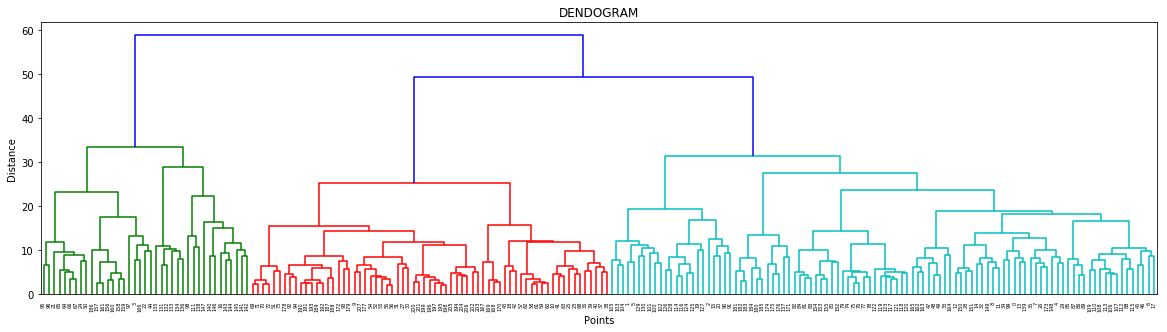

In [418]:
labels = {'R': 0, 'M': 1}
y = y.map(lambda x: labels[x])

hc = AgglomerativeClustering(n_clusters=2, linkage='ward')
predicted = hc.fit_predict(x)

Z = cluster.hierarchy.ward(x)
cutree = cluster.hierarchy.cut_tree(Z, n_clusters=[2])

plt.figure(figsize=(20, 5)) 
den = sch.dendrogram(Z)
plt.title('DENDOGRAM')
plt.xlabel('Points')
plt.ylabel('Distance');
plt.show()

In [419]:
print(confusion_matrix(y, predicted))
print(accuracy_score(y,predicted))

[[84 13]
 [85 26]]
0.5288461538461539
